# Smart Water Analytics

# AQUIFER

## AUSER

### Exploratory Data Analysis

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#!pip3 install seaborn==0.11.0 --upgrade
import seaborn as sns

In [2]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in c:\users\csuftitan\anaconda3\lib\site-packages (0.12.2)


In [3]:
auser_data= pd.read_csv("C:/Users/CSUFTitan/Desktop/Water Analytics Kaggle/Aquifer_Auser.csv",parse_dates=True)
auser_data

Date  Rainfall_Gallicano  Rainfall_Pontetetto  \
0     05/03/1998                 NaN                  NaN   
1     06/03/1998                 NaN                  NaN   
2     07/03/1998                 NaN                  NaN   
3     08/03/1998                 NaN                  NaN   
4     09/03/1998                 NaN                  NaN   
...          ...                 ...                  ...   
8149  26/06/2020                 0.0                  0.0   
8150  27/06/2020                 0.0                  0.0   
8151  28/06/2020                 0.0                  0.0   
8152  29/06/2020                 0.0                  0.0   
8153  30/06/2020                 0.0                  0.0   

      Rainfall_Monte_Serra  Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  \
0                      NaN                NaN                       NaN   
1                      NaN                NaN                       NaN   
2                      NaN                NaN                       NaN   
3                      NaN                NaN                       NaN   
4                      NaN                NaN                       NaN   
...                    ...                ...                       ...   
8149                   0.0                0.0                       0.0   
8150                   0.0                0.0                       0.0   
8151                   0.0                0.0                       0.0   
8152                   0.0                0.0                       0.0   
8153                   0.0                0.0                       0.0   

      Rainfall_Piaggione  Rainfall_Calavorno  Rainfall_Croce_Arcana  \
0                    NaN                 NaN                    NaN   
1                    NaN                 NaN                    NaN   
2                    NaN                 NaN                    NaN   
3                    NaN                 NaN                    NaN   
4                    NaN                 NaN                    NaN   
...                  ...                 ...                    ...   
8149                 0.0                 0.0                    0.0   
8150                 0.0                 0.0                    0.0   
8151                 0.0                 0.0                    0.0   
8152                 0.0                 0.0                    0.0   
8153                 0.0                 0.0                    0.0   

      Rainfall_Tereglio_Coreglia_Antelminelli  ...  Temperature_Monte_Serra  \
0                                         NaN  ...                     0.00   
1                                         NaN  ...                     0.00   
2                                         NaN  ...                     9.20   
3                                         NaN  ...                    11.40   
4                                         NaN  ...                    11.40   
...                                       ...  ...                      ...   
8149                                      0.0  ...                    20.75   
8150                                      0.0  ...                    21.35   
8151                                      0.0  ...                    21.75   
8152                                      0.0  ...                    18.90   
8153                                      0.0  ...                    19.90   

      Temperature_Ponte_a_Moriano  Temperature_Lucca_Orto_Botanico  \
0                             0.0                             0.00   
1                             0.0                            10.05   
2                             0.0                            10.00   
3                             0.0                            13.85   
4                             0.0                            12.85   
...                           ...                              ...   
8149                          0.0                            23.75   
8150            


Determine the shape or structure of the data frame.

In [4]:
print('Shape: ', auser_data.shape)

Shape:  (8154, 27)


Different datatypes present in our dataset.

In [5]:
auser_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

The Date column has data type 'object' which need to be changed to 'DateTime'

In [6]:
auser_data['Date'] = pd.to_datetime(auser_data.Date, format = '%d/%m/%Y')

In [7]:
auser_data.dtypes

Date                                       datetime64[ns]
Rainfall_Gallicano                                float64
Rainfall_Pontetetto                               float64
Rainfall_Monte_Serra                              float64
Rainfall_Orentano                                 float64
Rainfall_Borgo_a_Mozzano                          float64
Rainfall_Piaggione                                float64
Rainfall_Calavorno                                float64
Rainfall_Croce_Arcana                             float64
Rainfall_Tereglio_Coreglia_Antelminelli           float64
Rainfall_Fabbriche_di_Vallico                     float64
Depth_to_Groundwater_LT2                          float64
Depth_to_Groundwater_SAL                          float64
Depth_to_Groundwater_PAG                          float64
Depth_to_Groundwater_CoS                          float64
Depth_to_Groundwater_DIEC                         float64
Temperature_Orentano                              float64
Temperature_Mo

Our Output Features/ Dependent variables are: 
1. Depth_to_Groundwater_SAL 
2. Depth_to_Groundwater_LT2 
3. Depth_to_Groundwater_CoS

In [8]:
auser_data= auser_data.set_index('Date')

In [9]:
df_auser= auser_data[["Depth_to_Groundwater_SAL","Depth_to_Groundwater_LT2","Depth_to_Groundwater_CoS"]]
sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
sns.color_palette("husl", 9)
#sns.lineplot(data=df_auser)
df_auser.plot(linewidth=2, fontsize=12)

<Figure size 720x504 with 0 Axes>

#### Handling Missing Values

In [10]:
print("The percentage of missing values in dataset")
((auser_data.isnull() | auser_data.isna()).sum() * 100 / auser_data.index.size).round(2)

The percentage of missing values in dataset


Rainfall_Gallicano                         35.06
Rainfall_Pontetetto                        35.06
Rainfall_Monte_Serra                       35.14
Rainfall_Orentano                          35.06
Rainfall_Borgo_a_Mozzano                   35.06
Rainfall_Piaggione                         39.54
Rainfall_Calavorno                         35.06
Rainfall_Croce_Arcana                      35.06
Rainfall_Tereglio_Coreglia_Antelminelli    35.06
Rainfall_Fabbriche_di_Vallico              35.06
Depth_to_Groundwater_LT2                   41.11
Depth_to_Groundwater_SAL                   44.26
Depth_to_Groundwater_PAG                   53.31
Depth_to_Groundwater_CoS                   47.08
Depth_to_Groundwater_DIEC                  59.90
Temperature_Orentano                        0.00
Temperature_Monte_Serra                     0.00
Temperature_Ponte_a_Moriano                 0.00
Temperature_Lucca_Orto_Botanico             0.00
Volume_POL                                 30.59
Volume_CC1          

After looking at the percentage of missing values in each columns we will remove the columns with missing value % more than 50% because it might afftec the performance of our model.

So we will remove *Depth_to_Groundwater_DIEC* and *Depth_to_Groundwater_PAG*

In [11]:
auser_data= auser_data.drop(columns=['Depth_to_Groundwater_DIEC','Depth_to_Groundwater_PAG'])

In [12]:
auser_data= auser_data.dropna(0,how='all',thresh=22)

Now we will interpolate the missing data.

In [13]:
auser_data = auser_data.interpolate(method = 'linear')

In [14]:
auser_data = auser_data.apply(lambda x: x.fillna(x.mean()),axis=0)

In [15]:
print("The percentage of missing values in dataset")
((auser_data.isnull() | auser_data.isna()).sum() * 100 / auser_data.index.size).round(2)

The percentage of missing values in dataset


Rainfall_Gallicano                         0.0
Rainfall_Pontetetto                        0.0
Rainfall_Monte_Serra                       0.0
Rainfall_Orentano                          0.0
Rainfall_Borgo_a_Mozzano                   0.0
Rainfall_Piaggione                         0.0
Rainfall_Calavorno                         0.0
Rainfall_Croce_Arcana                      0.0
Rainfall_Tereglio_Coreglia_Antelminelli    0.0
Rainfall_Fabbriche_di_Vallico              0.0
Depth_to_Groundwater_LT2                   0.0
Depth_to_Groundwater_SAL                   0.0
Depth_to_Groundwater_CoS                   0.0
Temperature_Orentano                       0.0
Temperature_Monte_Serra                    0.0
Temperature_Ponte_a_Moriano                0.0
Temperature_Lucca_Orto_Botanico            0.0
Volume_POL                                 0.0
Volume_CC1                                 0.0
Volume_CC2                                 0.0
Volume_CSA                                 0.0
Volume_CSAL  

<Figure size 720x504 with 0 Axes>

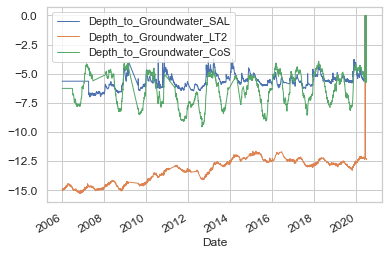

In [16]:
auser_plot= auser_data[["Depth_to_Groundwater_SAL","Depth_to_Groundwater_LT2","Depth_to_Groundwater_CoS"]]
sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
sns.color_palette("husl", 9)
#sns.lineplot(data=plot, legend="full", err_style="bars")
auser_plot.plot(linewidth=1, fontsize=12)

In [17]:

fig, axs = plt.subplots(5, 2,figsize=(15,11))
axs[0, 0].plot(auser_data[["Rainfall_Monte_Serra"]])
axs[0, 0].set_title('Rainfall_Monte_Serra')
axs[0, 1].plot(auser_data[["Rainfall_Piaggione"]])
axs[0, 1].set_title('Rainfall_Piaggione')
axs[1, 0].plot(auser_data[["Rainfall_Gallicano"]])
axs[1, 0].set_title('Rainfall_Gallicano')
axs[1, 1].plot(auser_data[["Rainfall_Pontetetto"]])
axs[1, 1].set_title('Rainfall_Pontetetto')
axs[2, 0].plot(auser_data[["Rainfall_Orentano"]])
axs[2, 0].set_title('Rainfall_Orentano')
axs[2, 1].plot(auser_data[["Rainfall_Borgo_a_Mozzano"]])
axs[2, 1].set_title('Rainfall_Borgo_a_Mozzano')
axs[3, 0].plot(auser_data[["Rainfall_Calavorno"]])
axs[3, 0].set_title('Rainfall_Calavorno')
axs[3, 1].plot(auser_data[["Rainfall_Croce_Arcana"]])
axs[3, 1].set_title('Rainfall_Croce_Arcana')
axs[4, 0].plot(auser_data[["Rainfall_Tereglio_Coreglia_Antelminelli"]])
axs[4, 0].set_title('Rainfall_Tereglio_Coreglia_Antelminelli')
axs[4, 1].plot(auser_data[["Rainfall_Fabbriche_di_Vallico"]])
axs[4, 1].set_title('Rainfall_Fabbriche_di_Vallico')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Rainfall(mm)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Now we will plot correlation matrix for all the features/independent variables.

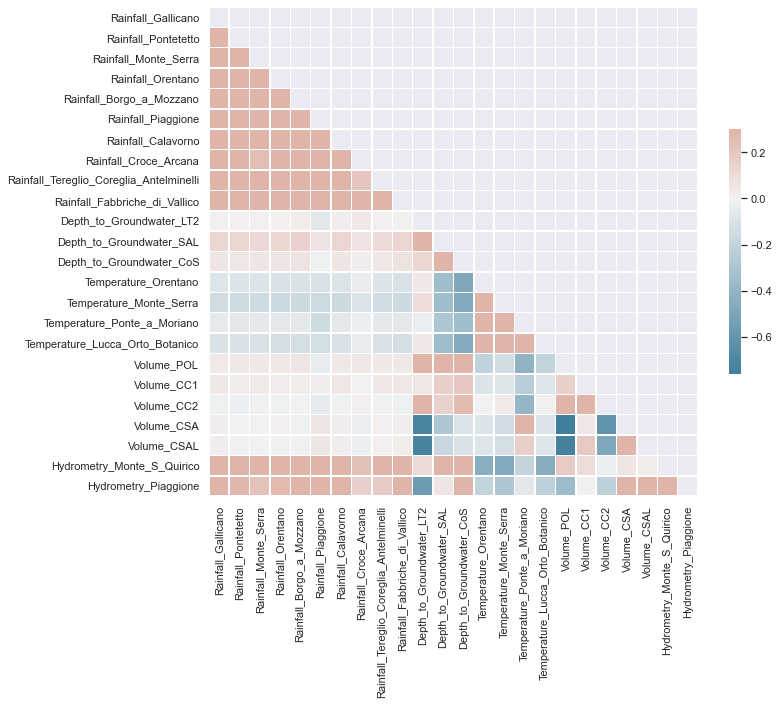

In [18]:
sns.set(style="dark")

# Compute the correlation matrix
corr = auser_data.corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Checking The Stationarity

In order to check the stationarity of the time series (i.e identify wether the time series is stationary or not) we perform Augmented Dickey-Fuller test (ADF Test.)

For AD Fuller test:

1. Null Hypothesis - Series possesses a unit root and hence is not stationary.
2. Alternate Hypothesis - Series is stationary

In [19]:
!pip install seaborn

In [20]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(auser_data.columns)):
  result = adfuller(auser_data[auser_data.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(auser_data.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(auser_data.columns[i]))
    print(" ")

AUGMENTED DICKEY FULLER TEST 


Rainfall_Gallicano - Series is Stationary
 
Rainfall_Pontetetto - Series is Stationary
 
Rainfall_Monte_Serra - Series is Stationary
 
Rainfall_Orentano - Series is Stationary
 
Rainfall_Borgo_a_Mozzano - Series is Stationary
 
Rainfall_Piaggione - Series is Stationary
 
Rainfall_Calavorno - Series is Stationary
 
Rainfall_Croce_Arcana - Series is Stationary
 
Rainfall_Tereglio_Coreglia_Antelminelli - Series is Stationary
 
Rainfall_Fabbriche_di_Vallico - Series is Stationary
 
Depth_to_Groundwater_LT2 - Series is NOT Stationary
 
Depth_to_Groundwater_SAL - Series is Stationary
 
Depth_to_Groundwater_CoS - Series is Stationary
 
Temperature_Orentano - Series is Stationary
 
Temperature_Monte_Serra - Series is Stationary
 
Temperature_Ponte_a_Moriano - Series is Stationary
 
Temperature_Lucca_Orto_Botanico - Series is Stationary
 
Volume_POL - Series is NOT Stationary
 
Volume_CC1 - Series is NOT Stationary
 
Volume_CC2 - Series is NOT Stationary
 
Volume

Now we will remove the Non- Stationarity by using Differencing

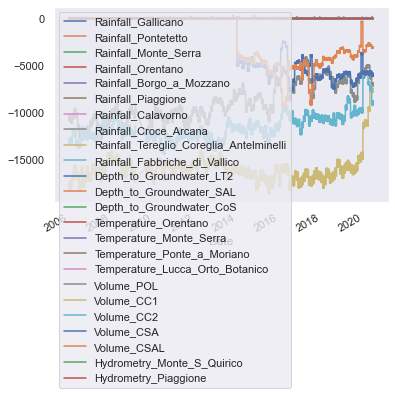

In [21]:
auser_data.dropna().plot()

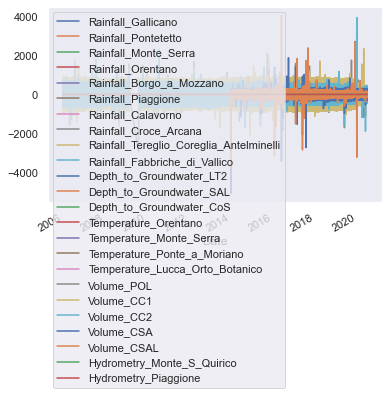

In [22]:
auser_data=auser_data-auser_data.shift(1)
auser_data.dropna().plot()

In [23]:
auser_data.head()

Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
Date                                                                        
2006-01-01                 NaN                  NaN                   NaN   
2006-01-02               -34.0                -17.6                 -21.2   
2006-01-03                -3.0                 -8.4                  -0.2   
2006-01-04                -0.2                  0.2                   0.0   
2006-01-05                 0.0                 -0.2                   0.0   

            Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
Date                                                                          
2006-01-01                NaN                       NaN                 NaN   
2006-01-02              -35.2                     -23.4               -27.8   
2006-01-03               -7.8                      -6.0                -7.2   
2006-01-04               -0.2                       0.0                -0.2   
2006-01-05                0.0                       0.0                 0.0   

            Rainfall_Calavorno  Rainfall_Croce_Arcana  \
Date                                                    
2006-01-01                 NaN                    NaN   
2006-01-02               -27.6                    0.0   
2006-01-03                -3.6                    0.0   
2006-01-04                 0.2                    0.0   
2006-01-05                -0.2                    0.0   

            Rainfall_Tereglio_Coreglia_Antelminelli  \
Date                                                  
2006-01-01                                      NaN   
2006-01-02                                    -11.2   
2006-01-03                                      0.2   
2006-01-04                                     -0.2   
2006-01-05                                      0.0   

            Rainfall_Fabbriche_di_Vallico  ...  Temperature_Monte_Serra  \
Date                                       ...                            
2006-01-01                            NaN  ...                      NaN   
2006-01-02                          -33.8  ...                      0.0   
2006-01-03                           -4.0  ...                      0.0   
2006-01-04                           -0.2  ...                      0.0   
2006-01-05                            0.0  ...                      0.0   

            Temperature_Ponte_a_Moriano  Temperature_Lucca_Orto_Botanico  \
Date                                                                       
2006-01-01                          NaN                              NaN   
2006-01-02                         0.45                            -0.50   
2006-01-03                         0.70                             0.85   
2006-01-04                        -2.45                            -2.35   
2006-01-05                         0.55                             0.40   

            Volume_POL  Volume_CC1  Volume_CC2  Volume_CSA  Volume_CSAL  \
Date                                                                      
2006-01-01         NaN         NaN         NaN         NaN          NaN   
2006-01-02  -545.00323  -912.20961  -669.30039         0.0          0.0   
2006-01-03     0.00000     0.00000     0.00000         0.0          0.0   
2006-01-04     0.00000     0.00000     0.00000         0.0          0.0   
2006-01-05     0.00000     0.00000     0.00000         0.0          0.0   

            Hydrometry_Monte_S_Quirico  Hydrometry_Piaggione  
Date                                                          
2006-01-01                         NaN                   NaN  
2006-01-02                        0.03                  0.15  
2006-01-03                       -0.05                 -0.25  
2006-01-04                       -0.05                 -0.26  
2006-01-05                       -0.05                 -0.03  

[5 rows x 24 columns]

We will remove the first row because it consist of missing values or NAN

In [24]:
auser_data = auser_data.iloc[1:]

#### Confirming Stationarity

Now we will run the AD Fuller Test on the data to confirm if the all the timeseries are stationary or not.

In [25]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(auser_data.columns)):
  result = adfuller(auser_data[auser_data.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(auser_data.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(auser_data.columns[i]))
    print(" ")

AUGMENTED DICKEY FULLER TEST 


Rainfall_Gallicano - Series is Stationary
 
Rainfall_Pontetetto - Series is Stationary
 
Rainfall_Monte_Serra - Series is Stationary
 
Rainfall_Orentano - Series is Stationary
 
Rainfall_Borgo_a_Mozzano - Series is Stationary
 
Rainfall_Piaggione - Series is Stationary
 
Rainfall_Calavorno - Series is Stationary
 
Rainfall_Croce_Arcana - Series is Stationary
 
Rainfall_Tereglio_Coreglia_Antelminelli - Series is Stationary
 
Rainfall_Fabbriche_di_Vallico - Series is Stationary
 
Depth_to_Groundwater_LT2 - Series is Stationary
 
Depth_to_Groundwater_SAL - Series is Stationary
 
Depth_to_Groundwater_CoS - Series is Stationary
 
Temperature_Orentano - Series is Stationary
 
Temperature_Monte_Serra - Series is Stationary
 
Temperature_Ponte_a_Moriano - Series is Stationary
 
Temperature_Lucca_Orto_Botanico - Series is Stationary
 
Volume_POL - Series is Stationary
 
Volume_CC1 - Series is Stationary
 
Volume_CC2 - Series is Stationary
 
Volume_CSA - Series is

Since the time Series is stationary we can proceed with the model building section.

### Building Predictive Models

#### Split Data into Training and Testing set

In [26]:
temp=auser_data
temp= temp.drop(columns=["Depth_to_Groundwater_SAL","Depth_to_Groundwater_LT2","Depth_to_Groundwater_CoS"])

df= auser_data[["Depth_to_Groundwater_SAL","Depth_to_Groundwater_LT2","Depth_to_Groundwater_CoS"]]
new= pd.merge(temp, df, left_index=True, right_index=True)

# Update the main dataframe i.e. auser_data
auser_data=new
auser_data.head()

Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
Date                                                                        
2006-01-02               -34.0                -17.6                 -21.2   
2006-01-03                -3.0                 -8.4                  -0.2   
2006-01-04                -0.2                  0.2                   0.0   
2006-01-05                 0.0                 -0.2                   0.0   
2006-01-06                 0.0                  0.0                   0.0   

            Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
Date                                                                          
2006-01-02              -35.2                     -23.4               -27.8   
2006-01-03               -7.8                      -6.0                -7.2   
2006-01-04               -0.2                       0.0                -0.2   
2006-01-05                0.0                       0.0                 0.0   
2006-01-06                0.0                       0.0                 0.0   

            Rainfall_Calavorno  Rainfall_Croce_Arcana  \
Date                                                    
2006-01-02               -27.6                    0.0   
2006-01-03                -3.6                    0.0   
2006-01-04                 0.2                    0.0   
2006-01-05                -0.2                    0.0   
2006-01-06                 0.0                    0.4   

            Rainfall_Tereglio_Coreglia_Antelminelli  \
Date                                                  
2006-01-02                                    -11.2   
2006-01-03                                      0.2   
2006-01-04                                     -0.2   
2006-01-05                                      0.0   
2006-01-06                                      0.0   

            Rainfall_Fabbriche_di_Vallico  ...  Volume_POL  Volume_CC1  \
Date                                       ...                           
2006-01-02                          -33.8  ...  -545.00323  -912.20961   
2006-01-03                           -4.0  ...     0.00000     0.00000   
2006-01-04                           -0.2  ...     0.00000     0.00000   
2006-01-05                            0.0  ...     0.00000     0.00000   
2006-01-06                            0.0  ...     0.00000     0.00000   

            Volume_CC2  Volume_CSA  Volume_CSAL  Hydrometry_Monte_S_Quirico  \
Date                                                                          
2006-01-02  -669.30039         0.0          0.0                        0.03   
2006-01-03     0.00000         0.0          0.0                       -0.05   
2006-01-04     0.00000         0.0          0.0                       -0.05   
2006-01-05     0.00000         0.0          0.0                       -0.05   
2006-01-06     0.00000         0.0          0.0                       -0.03   

            Hydrometry_Piaggione  Depth_to_Groundwater_SAL  \
Date                                                         
2006-01-02                  0.15                       0.0   
2006-01-03                 -0.25                       0.0   
2006-01-04                 -0.26                       0.0   
2006-01-05                 -0.03                       0.0   
2006-01-06                 -0.03                       0.0   

            Depth_to_Groundwater_LT2  Depth_to_Groundwater_CoS  
Date                                                            
2006-01-02                     -0.02                       0.0  
2006-01-03                     -0.06                       0.0  
2006-01-04                      0.00                       0.0  
2006-01-05                      0.00                       0.0  
2006-01-06                     -0.02                       0.0  

[5 rows x 24 columns]

In [27]:
auser_data.shape

(5102, 24)

In [28]:
X, Y = np.split(auser_data,[-3],axis=1)

In [29]:
X.shape

(5102, 21)

In [30]:
Y.shape

(5102, 3)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

In [32]:
X_train.shape

(4081, 21)

We will use Standard Scalar Scalar for scaling the features of our dataset.

In [33]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
X.describe()

Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
count         5102.000000          5102.000000           5102.000000   
mean            -0.007291            -0.005096             -0.004194   
std             17.529629            12.698680             13.813925   
min           -312.400000          -141.600000           -137.600000   
25%             -0.200000            -0.200000             -0.200000   
50%              0.000000             0.000000              0.000000   
75%              0.200000             0.000000              0.200000   
max            318.800000           146.600000            152.200000   

       Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
count        5102.000000               5102.000000         5102.000000   
mean           -0.008467                 -0.005762           -0.006899   
std            10.933417                 15.306339           12.978307   
min          -107.400000               -171.400000         -114.800000   
25%            -0.200000                 -0.200000            0.000000   
50%             0.000000                  0.000000            0.000000   
75%             0.200000                  0.200000            0.200000   
max           108.800000                165.800000          132.400000   

       Rainfall_Calavorno  Rainfall_Croce_Arcana  \
count         5102.000000           5.102000e+03   
mean            -0.006115           6.963375e-19   
std             15.093358           1.200783e+01   
min           -199.000000          -2.628000e+02   
25%             -0.200000          -2.000000e-01   
50%              0.000000           0.000000e+00   
75%              0.200000           2.000000e-01   
max            209.000000           2.850000e+02   

       Rainfall_Tereglio_Coreglia_Antelminelli  Rainfall_Fabbriche_di_Vallico  \
count                              5102.000000                    5102.000000   
mean                                 -0.002195                      -0.007448   
std                                  13.390832                      19.525415   
min                                -146.400000                    -185.600000   
25%                                  -0.200000                      -0.400000   
50%                                   0.000000                       0.000000   
75%                                   0.200000                       0.200000   
max                                 147.200000                     197.000000   

       ...  Temperature_Monte_Serra  Temperature_Ponte_a_Moriano  \
count  ...              5102.000000                  5102.000000   
mean   ...                 0.003900                    -0.001000   
std    ...                 1.986552                     1.522767   
min    ...               -25.050000                   -20.750000   
25%    ...                -1.050000                    -0.500000   
50%    ...                 0.000000                     0.000000   
75%    ...                 1.100000                     0.600000   
max    ...                26.850000                     9.050000   

       Temperature_Lucca_Orto_Botanico   Volume_POL   Volume_CC1   Volume_CC2  \
count                      5102.000000  5102.000000  5102.000000  5102.000000   
mean                          0.003773     0.620473     1.858895     0.692527   
std                           1.764239   284.338754   456.745902   340.752783   
min                          -7.900000 -2952.628645 -2095.329600 -1890.038172   
25%                          -1.000000     0.000000     0.000000     0.000000   
50%                           0.050000     0.000000     0.000000     0.000000   
75%                           1.000000     0.000000     0.000000     0.000000   
max                          14.450000  2098.688000  3360.395610  3946.022452   

        Volume_CSA  Volume_CSAL  Hydrometry_Monte_S_Quirico  \
count  5102.000000  5102.000000                 5102.000000   
mean     -1.198628    -

#### 1. LSTM Model.

In [37]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [35]:
# Import necessary libraries and packages from Keras for building mode
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [41]:
# Initialize the Neural Network based on LSTM RNN
model = Sequential()

# Add 1st LSTM RNN layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(1, 21)))

# Adding 2nd LSTM layer
model.add(LSTM(units=32, return_sequences=True))

# Adding 3rd LSTM layer
model.add(LSTM(units=16, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=3, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

NameError: name 'Sequential' is not defined

In [40]:
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
#mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
#  callbacks=[early_stopping, rlr, mcp, tb]
#tb = TensorBoard('logs')

history = model.fit(X_train, Y_train, shuffle=True, epochs=250, validation_split=0.2, verbose=1, batch_size=256)

NameError: name 'model' is not defined

In [ ]:
model.save_weights("Auser_M3.h5")

In [ ]:
train_pred = model.predict(X_train)

In [ ]:
print(train_pred)


In [ ]:
print(Y_train)

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
print(test_pred)

print(Y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_mse = mean_squared_error(Y_train, train_pred)
print('Train MSE: %.3f' % train_mse)

test_mse = mean_squared_error(Y_test, test_pred)
print('Test MSE: %.3f' % test_mse)

train_mae = mean_absolute_error(Y_train, train_pred)
print('Train MAE: %.3f' % train_mae)

test_mae = mean_absolute_error(Y_test, test_pred)
print('Test MAE: %.3f' % test_mae)

## DOGANELLA

### Exploratory Data Analysis

#### Importing The Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
import missingno as mn
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [ ]:
doganella = pd.read_csv('/content/drive/MyDrive/STUDY/Kaggle_Water_Analytics/Data/Aquifer_Doganella.csv',parse_dates=True)
doganella

Determine the shape or structure of the data frame.

In [ ]:
print('Shape: ', doganella.shape)

#### Handling Missing Values

In [ ]:
print("The percentage of missing values in dataset")
((doganella.isnull() | doganella.isna()).sum() * 100 / doganella.index.size).round(2)

In [ ]:
doganella = doganella.dropna(0,how ='all',thresh=7)
doganella

In [ ]:
print("The percentage of missing values in dataset")
((doganella.isnull() | doganella.isna()).sum() * 100 / doganella.index.size).round(2)

In [ ]:
doganella.shape

In [ ]:
doganella_plot = doganella[['Depth_to_Groundwater_Pozzo_1','Depth_to_Groundwater_Pozzo_2', 'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4', 'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6', 'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8', 'Depth_to_Groundwater_Pozzo_9']]
sns.set(style="whitegrid")
plt.figure(figsize=(35,7))
sns.color_palette("husl", 9)
sns.lineplot(data=doganella_plot)
#df_auser.plot(linewidth=2, fontsize=12)

In [ ]:
doganella = doganella.set_index('Date')
doganella.index = pd.to_datetime(doganella.index)

In [ ]:
doganella = doganella.interpolate(method = 'time')

In [ ]:
doganella = doganella.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
print("The percentage of missing values in dataset")
((doganella.isnull() | doganella.isna()).sum() * 100 / doganella.index.size).round(2)

### Checking The Stationarity

In order to check the stationarity of the time series (i.e identify wether the time series is stationary or not) we perform Augmented Dickey-Fuller test (ADF Test.)

For AD Fuller test:

1. Null Hypothesis - Series possesses a unit root and hence is not stationary.
2. Alternate Hypothesis - Series is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(doganella.columns)):
  result = adfuller(doganella[doganella.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(doganella.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(doganella.columns[i]))
    print(" ")

Now we will remove the Non- Stationarity by using Differencing

In [ ]:
doganella.dropna().plot()

In [ ]:
doganella=doganella-doganella.shift(1)
doganella.dropna().plot()

In [ ]:
doganella.head()

We will remove the first row because it consist of missing values or NAN

In [ ]:
doganella = doganella.iloc[1:]

#### Confirming Stationarity

Now we will run the AD Fuller Test on the data to confirm if the all the timeseries are stationary or not.

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(doganella.columns)):
  result = adfuller(doganella[doganella.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(doganella.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(doganella.columns[i]))
    print(" ")

Since the time Series is stationary we can proceed with the model building section.

### Building Predictive Models

#### Split Data into Training and Testing set

In [ ]:
temp=doganella
temp= temp.drop(columns=['Depth_to_Groundwater_Pozzo_1','Depth_to_Groundwater_Pozzo_2', 'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4', 'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6', 'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8', 'Depth_to_Groundwater_Pozzo_9'])

df= doganella[['Depth_to_Groundwater_Pozzo_1','Depth_to_Groundwater_Pozzo_2', 'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4', 'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6', 'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8', 'Depth_to_Groundwater_Pozzo_9']]
new= pd.merge(temp, df, left_index=True, right_index=True)

# Update the main dataframe i.e. auser_data
doganella=new
doganella.head()

In [ ]:
doganella.tail()

In [ ]:
doganella.shape

In [ ]:
X, Y = np.split(doganella,[-9],axis=1)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

In [ ]:
X_train.shape

We will use Standard Scalar Scalar for scaling the features of our dataset.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X.describe()

#### 1. LSTM Model.

In [ ]:
# Import necessary libraries and packages from Keras for building model
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Initialize the Neural Network based on LSTM RNN
model = Sequential()

# Add 1st LSTM RNN layer
model.add(LSTM(units=32, return_sequences=True, input_shape=(1, 12)))

# Adding 2nd LSTM layer
#model.add(LSTM(units=32, return_sequences=True))

# Adding 3rd LSTM layer
model.add(LSTM(units=16, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=9, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
#mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
#  callbacks=[early_stopping, rlr, mcp, tb]
#tb = TensorBoard('logs')

history = model.fit(X_train, Y_train, shuffle=True, epochs=200, validation_split=0.1, verbose=1, batch_size=256)

In [ ]:
model.save_weights("Doganella_M1.h5")

In [ ]:
train_pred = model.predict(X_train)

In [ ]:
print(train_pred)


In [ ]:
print(Y_train)

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
print(test_pred)

print(Y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_mse = mean_squared_error(Y_train, train_pred)
print('Train MSE: %.3f' % train_mse)

test_mse = mean_squared_error(Y_test, test_pred)
print('Test MSE: %.3f' % test_mse)

train_mae = mean_absolute_error(Y_train, train_pred)
print('Train MAE: %.3f' % train_mae)

test_mae = mean_absolute_error(Y_test, test_pred)
print('Test MAE: %.3f' % test_mae)

## LUCO

### Exploratory Data Analysis

#### Importing The Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
import missingno as mn
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [ ]:
luco = pd.read_csv('/content/drive/MyDrive/STUDY/Kaggle_Water_Analytics/Data/Aquifer_Luco.csv',parse_dates=True)
luco

Determine the shape or structure of the data frame.

In [ ]:
print('Shape: ', luco.shape)

#### Handling Missing Values

In [ ]:
print("The percentage of missing values in dataset")
((luco.isnull() | luco.isna()).sum() * 100 / luco.index.size).round(2)

In [ ]:
luco = luco.dropna(0,how ='all',thresh=8)
luco

In [ ]:
print("The percentage of missing values in dataset")
((luco.isnull() | luco.isna()).sum() * 100 / luco.index.size).round(2)

In [ ]:
luco.shape

In [ ]:
luco_plot = luco[['Depth_to_Groundwater_Podere_Casetta']]
sns.set(style="whitegrid")
plt.figure(figsize=(35,7))
sns.color_palette("husl", 9)
sns.lineplot(data=doganella_plot)
#df_auser.plot(linewidth=2, fontsize=12)

In [ ]:
luco = luco.set_index('Date')
luco.index = pd.to_datetime(luco.index)

In [ ]:
luco = luco.interpolate(method = 'time')

In [ ]:
luco = luco.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
print("The percentage of missing values in dataset")
((luco.isnull() | luco.isna()).sum() * 100 / luco.index.size).round(2)

### Checking The Stationarity

In order to check the stationarity of the time series (i.e identify wether the time series is stationary or not) we perform Augmented Dickey-Fuller test (ADF Test.)

For AD Fuller test:

1. Null Hypothesis - Series possesses a unit root and hence is not stationary.
2. Alternate Hypothesis - Series is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(luco.columns)):
  result = adfuller(luco[luco.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(luco.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(luco.columns[i]))
    print(" ")

Now we will remove the Non- Stationarity by using Differencing

In [ ]:
luco.dropna().plot()

In [ ]:
luco= luco-luco.shift(1)
luco.dropna().plot()

In [ ]:
luco.head()

We will remove the first row because it consist of missing values or NAN

In [ ]:
luco = luco.iloc[1:]

#### Confirming Stationarity

Now we will run the AD Fuller Test on the data to confirm if the all the timeseries are stationary or not.

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(luco.columns)):
  result = adfuller(luco[luco.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(luco.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(luco.columns[i]))
    print(" ")

Since the time Series is stationary we can proceed with the model building section.

### Building Predictive Models

#### Split Data into Training and Testing set

In [ ]:
temp=luco
temp= temp.drop(columns=['Depth_to_Groundwater_Podere_Casetta'])

df= luco[['Depth_to_Groundwater_Podere_Casetta']]
new= pd.merge(temp, df, left_index=True, right_index=True)

# Update the main dataframe i.e. auser_data
luco= new
luco.head()

In [ ]:
luco.tail(500)

In [ ]:
luco.shape

In [ ]:
X, Y = np.split(luco,[-1],axis=1)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

In [ ]:
X_train.shape

We will use Standard Scalar Scalar for scaling the features of our dataset.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X.describe()

#### 1. LSTM Model.

In [ ]:
# Import necessary libraries and packages from Keras for building model
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Initialize the Neural Network based on LSTM RNN
model = Sequential()

# Add 1st LSTM RNN layer
model.add(LSTM(units=32, return_sequences=True, input_shape=(1, 20)))

# Adding 2nd LSTM layer
#model.add(LSTM(units=32, return_sequences=True))

# Adding 3rd LSTM layer
model.add(LSTM(units=16, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
#mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
#  callbacks=[early_stopping, rlr, mcp, tb]
#tb = TensorBoard('logs')

history = model.fit(X_train, Y_train, shuffle=True, epochs=150, validation_split=0.2, verbose=1, batch_size=64)

In [ ]:
model.save_weights("luco_M1.h5")

In [ ]:
train_pred = model.predict(X_train)

In [ ]:
print(train_pred)


In [ ]:
print(Y_train)

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
print(test_pred)



In [ ]:
Y_test.iloc[:,-1].values*100

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_mse = mean_squared_error(Y_train, train_pred)
print('Train MSE: %.3f' % train_mse)

test_mse = mean_squared_error(Y_test, test_pred)
print('Test MSE: %.3f' % test_mse)

train_mae = mean_absolute_error(Y_train, train_pred)
print('Train MAE: %.3f' % train_mae)

test_mae = mean_absolute_error(Y_test, test_pred)
print('Test MAE: %.3f' % test_mae)

## PETRIGNANO

### Exploratory Data Analysis

#### Importing The Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
import missingno as mn
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [ ]:
petrignano = pd.read_csv('/content/drive/MyDrive/STUDY/Kaggle_Water_Analytics/Data/Aquifer_Petrignano.csv',parse_dates=True)
petrignano

Determine the shape or structure of the data frame.

In [ ]:
print('Shape: ', petrignano.shape)

#### Handling Missing Values

In [ ]:
print("The percentage of missing values in dataset")
((petrignano.isnull() | petrignano.isna()).sum() * 100 / petrignano.index.size).round(2)

In [ ]:
petrignano = petrignano.dropna(0,how ='all',thresh=3)
petrignano

In [ ]:
print("The percentage of missing values in dataset")
((petrignano.isnull() | petrignano.isna()).sum() * 100 / petrignano.index.size).round(2)

In [ ]:
petrignano.shape

In [ ]:
petrignano_plot = petrignano[['Depth_to_Groundwater_P24','Depth_to_Groundwater_P25']]
sns.set(style="whitegrid")
plt.figure(figsize=(35,7))
sns.color_palette("husl", 9)
sns.lineplot(data=petrignano_plot)
#df_auser.plot(linewidth=2, fontsize=12)

In [ ]:
petrignano = petrignano.set_index('Date')
petrignano.index = pd.to_datetime(petrignano.index)

In [ ]:
petrignano = petrignano.interpolate(method = 'time')

In [ ]:
petrignano = petrignano.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
print("The percentage of missing values in dataset")
((petrignano.isnull() | petrignano.isna()).sum() * 100 / petrignano.index.size).round(2)

### Checking The Stationarity

In order to check the stationarity of the time series (i.e identify wether the time series is stationary or not) we perform Augmented Dickey-Fuller test (ADF Test.)

For AD Fuller test:

1. Null Hypothesis - Series possesses a unit root and hence is not stationary.
2. Alternate Hypothesis - Series is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(petrignano.columns)):
  result = adfuller(petrignano[petrignano.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(petrignano.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(petrignano.columns[i]))
    print(" ")

Now we will remove the Non- Stationarity by using Differencing

In [ ]:
petrignano.dropna().plot()

In [ ]:
petrignano= petrignano-petrignano.shift(1)
petrignano.dropna().plot()

In [ ]:
petrignano.head()

We will remove the first row because it consist of missing values or NAN

In [ ]:
petrignano = petrignano.iloc[1:]

#### Confirming Stationarity

Now we will run the AD Fuller Test on the data to confirm if the all the timeseries are stationary or not.

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(petrignano.columns)):
  result = adfuller(petrignano[petrignano.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(petrignano.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(petrignano.columns[i]))
    print(" ")

Since the time Series is stationary we can proceed with the model building section.

### Building Predictive Models

#### Split Data into Training and Testing set

In [ ]:
temp=petrignano
temp= temp.drop(columns=['Depth_to_Groundwater_P24','Depth_to_Groundwater_P25'])

df= petrignano[['Depth_to_Groundwater_P24','Depth_to_Groundwater_P25']]
new= pd.merge(temp, df, left_index=True, right_index=True)

# Update the main dataframe i.e. auser_data
petrignano= new
petrignano.head()

In [ ]:
petrignano.tail(500)

In [ ]:
petrignano.shape

In [ ]:
X, Y = np.split(petrignano,[-2],axis=1)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

In [ ]:
X_train.shape

We will use Standard Scalar Scalar for scaling the features of our dataset.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X.describe()

#### 1. LSTM Model.

In [ ]:
# Import necessary libraries and packages from Keras for building model
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Initialize the Neural Network based on LSTM RNN
model = Sequential()

# Add 1st LSTM RNN layer
model.add(LSTM(units=32, return_sequences=True, input_shape=(1, 5)))

# Adding 2nd LSTM layer
#model.add(LSTM(units=32, return_sequences=True))

# Adding 3rd LSTM layer
model.add(LSTM(units=16, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=2, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
#mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
#  callbacks=[early_stopping, rlr, mcp, tb]
#tb = TensorBoard('logs')

history = model.fit(X_train, Y_train, shuffle=True, epochs=150, validation_split=0.2, verbose=1, batch_size=64)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights("petrignano_M1.h5")

In [ ]:
train_pred = model.predict(X_train)

In [ ]:
print(train_pred)


In [ ]:
print(Y_train)

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
print(test_pred)



In [ ]:
Y_test.iloc[:,-1].values*100

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_mse = mean_squared_error(Y_train, train_pred)
print('Train MSE: %.3f' % train_mse)

test_mse = mean_squared_error(Y_test, test_pred)
print('Test MSE: %.3f' % test_mse)

train_mae = mean_absolute_error(Y_train, train_pred)
print('Train MAE: %.3f' % train_mae)

test_mae = mean_absolute_error(Y_test, test_pred)
print('Test MAE: %.3f' % test_mae)

# WATER SPRING

## AMIATA

### Exploratory Data Analysis

#### Importing The Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
import missingno as mn
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [ ]:
amiata = pd.read_csv('/content/drive/MyDrive/STUDY/Kaggle_Water_Analytics/Data/Water_Spring_Amiata.csv',parse_dates=True)
amiata

Determine the shape or structure of the data frame.

In [ ]:
print('Shape: ', amiata.shape)

#### Handling Missing Values

In [ ]:
print("The percentage of missing values in dataset")
((amiata.isnull() | amiata.isna()).sum() * 100 / amiata.index.size).round(2)

In [ ]:
amiata = amiata.dropna(0,how ='all',thresh=5)
amiata

In [ ]:
print("The percentage of missing values in dataset")
((amiata.isnull() | amiata.isna()).sum() * 100 / amiata.index.size).round(2)

In [ ]:
amiata.shape

In [ ]:
amiata_plot = amiata[['Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']]
sns.set(style="whitegrid")
plt.figure(figsize=(35,7))
sns.color_palette("husl", 9)
sns.lineplot(data=amiata_plot)
#df_auser.plot(linewidth=2, fontsize=12)

In [ ]:
amiata = amiata.set_index('Date')
amiata.index = pd.to_datetime(amiata.index)

In [ ]:
amiata = amiata.interpolate(method = 'time')

In [ ]:
amiata = amiata.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = amiata.corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
print("The percentage of missing values in dataset")
((amiata.isnull() | amiata.isna()).sum() * 100 / amiata.index.size).round(2)

### Checking The Stationarity

In order to check the stationarity of the time series (i.e identify wether the time series is stationary or not) we perform Augmented Dickey-Fuller test (ADF Test.)

For AD Fuller test:

1. Null Hypothesis - Series possesses a unit root and hence is not stationary.
2. Alternate Hypothesis - Series is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(amiata.columns)):
  result = adfuller(amiata[amiata.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(amiata.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(amiata.columns[i]))
    print(" ")

Now we will remove the Non- Stationarity by using Differencing

In [ ]:
amiata.dropna().plot()

In [ ]:
amiata= amiata-amiata.shift(1)
amiata.dropna().plot()

In [ ]:
amiata.head()

We will remove the first row because it consist of missing values or NAN

In [ ]:
amiata = amiata.iloc[1:]

#### Confirming Stationarity

Now we will run the AD Fuller Test on the data to confirm if the all the timeseries are stationary or not.

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(amiata.columns)):
  result = adfuller(amiata[amiata.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(amiata.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(amiata.columns[i]))
    print(" ")

Since the time Series is stationary we can proceed with the model building section.

### Building Predictive Models

#### Split Data into Training and Testing set

In [ ]:
temp=amiata
temp= temp.drop(columns=['Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta'])

df= amiata[['Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']]
new= pd.merge(temp, df, left_index=True, right_index=True)

# Update the main dataframe i.e. auser_data
amiata= new
amiata.head()

In [ ]:
amiata.tail(500)

In [ ]:
amiata.shape

In [ ]:
X, Y = np.split(amiata,[-4],axis=1)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 12)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
Y_train.shape

In [ ]:
Y_test.shape

In [ ]:
Yt_pred.shape

We will use Standard Scalar Scalar for scaling the features of our dataset.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X.describe()

#### 1. XGBoost Regression Model.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgr
from sklearn.multioutput import MultiOutputRegressor

Training XGBoost with evaluation metric as MAE.

In [ ]:
xgr_mae = xgr.XGBRegressor(learning_rate =0.01, n_estimators=10000, max_depth=3, eval_metric='mae', seed=12)

In [ ]:
multioutputregressor = MultiOutputRegressor(xgr_mae)
xgbr_1= multioutputregressor.fit(X_train,Y_train)

In [ ]:
# For Training set Prediction
Yt_pred = xgbr_1.predict(X_train)

In [ ]:
# For Testing set Prediction
Y_pred=xgbr_1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [ ]:
# Mean Absolute Error
print("Training MAE", mean_absolute_error(Y_train, Yt_pred))
print("Testing MAE",mean_absolute_error(Y_test, Y_pred))

#### 1. LSTM Model.

In [ ]:
# Import necessary libraries and packages from Keras for building model
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Initialize the Neural Network based on LSTM RNN
model = Sequential()

# Add 1st LSTM RNN layer
model.add(LSTM(units=8, return_sequences=True, input_shape=(1, 11)))

# Adding 2nd LSTM layer
#model.add(LSTM(units=32, return_sequences=True))

# Adding 3rd LSTM layer
model.add(LSTM(units=16, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=4, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
#mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
#  callbacks=[early_stopping, rlr, mcp, tb]
#tb = TensorBoard('logs')

history = model.fit(X_train, Y_train, shuffle=True, epochs=50, validation_split=0.2, verbose=1, batch_size=32)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights("amiata_M1.h5")

In [ ]:
train_pred = model.predict(X_train)

In [ ]:
print(train_pred)


In [ ]:
print(Y_train)

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
print(test_pred)



In [ ]:
Y_test.iloc[:,-1].values*100

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_mse = mean_squared_error(Y_train, train_pred)
print('Train MSE: %.3f' % train_mse)

test_mse = mean_squared_error(Y_test, test_pred)
print('Test MSE: %.3f' % test_mse)

train_mae = mean_absolute_error(Y_train, train_pred)
print('Train MAE: %.3f' % train_mae)

test_mae = mean_absolute_error(Y_test, test_pred)
print('Test MAE: %.3f' % test_mae)

## MADONNA_DI_CANNETO

### Exploratory Data Analysis

#### Importing The Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
import missingno as mn
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [ ]:
mdc = pd.read_csv('/content/drive/MyDrive/STUDY/Kaggle_Water_Analytics/Data/Water_Spring_Madonna_di_Canneto.csv',parse_dates=True)
mdc

Determine the shape or structure of the data frame.

In [ ]:
print('Shape: ', mdc.shape)

#### Handling Missing Values

In [ ]:
print("The percentage of missing values in dataset")
((mdc.isnull() | mdc.isna()).sum() * 100 / mdc.index.size).round(2)

In [ ]:
mdc_plot = amiata[['Flow_Rate_Madonna_di_Canneto']]
sns.set(style="whitegrid")
plt.figure(figsize=(35,7))
sns.color_palette("husl", 9)
sns.lineplot(data=mdc_plot)
#df_auser.plot(linewidth=2, fontsize=12)

In [ ]:
mdc = mdc.dropna(subset = ["Date"])
mdc

In [ ]:
mdc = mdc.set_index('Date')
mdc.index = pd.to_datetime(mdc.index)

In [ ]:
mdc = mdc.interpolate(method = 'linear')

In [ ]:
mdc = mdc.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
print("The percentage of missing values in dataset")
((mdc.isnull() | mdc.isna()).sum() * 100 / mdc.index.size).round(2)

### Checking The Stationarity

In order to check the stationarity of the time series (i.e identify wether the time series is stationary or not) we perform Augmented Dickey-Fuller test (ADF Test.)

For AD Fuller test:

1. Null Hypothesis - Series possesses a unit root and hence is not stationary.
2. Alternate Hypothesis - Series is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(mdc.columns)):
  result = adfuller(mdc[mdc.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(mdc.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(mdc.columns[i]))
    print(" ")

Since the time Series is stationary we can proceed with the model building section.

### Building Predictive Models

#### Split Data into Training and Testing set

In [ ]:
temp=mdc
temp= temp.drop(columns=['Flow_Rate_Madonna_di_Canneto'])

df= mdc[['Flow_Rate_Madonna_di_Canneto']]
new= pd.merge(temp, df, left_index=True, right_index=True)

# Update the main dataframe i.e. auser_data
mdc= new
mdc.head()

In [ ]:
mdc.tail(500)

In [ ]:
mdc.shape

In [ ]:
X, Y = np.split(mdc,[-1],axis=1)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 12)

We will use Standard Scalar Scalar for scaling the features of our dataset.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X.describe()

#### 1. XGBoost Regression Model.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgr

Training XGBoost with evaluation metric as MAE.

In [ ]:
xgr_mae = xgr.XGBRegressor(learning_rate =0.01, n_estimators=10000, max_depth=3, eval_metric='mae', seed=12)

In [ ]:
xgbr_1= xgr_mae.fit(X_train,Y_train)

In [ ]:
# For Training set Prediction
Yt_pred = xgbr_1.predict(X_train)

In [ ]:
# For Testing set Prediction
Y_pred=xgbr_1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [ ]:
# Mean Absolute Error
print("Training MAE", mean_absolute_error(Y_train, Yt_pred))
print("Testing MAE",mean_absolute_error(Y_test, Y_pred))

#### 2. LSTM Model.

In [ ]:
# Import necessary libraries and packages from Keras for building model
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Initialize the Neural Network based on LSTM RNN
model = Sequential()

# Add 1st LSTM RNN layer
model.add(LSTM(units=32, return_sequences=True, input_shape=(1, 2)))

# Adding 2nd LSTM layer
#model.add(LSTM(units=32, return_sequences=True))

# Adding 3rd LSTM layer
model.add(LSTM(units=16, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_absolute_error')

In [ ]:
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
#mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
#  callbacks=[early_stopping, rlr, mcp, tb]
#tb = TensorBoard('logs')

history = model.fit(X_train, Y_train, shuffle=True, epochs=100, validation_split=0.2, verbose=1, batch_size=32)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights("mdc_M1.h5")

In [ ]:
train_pred = model.predict(X_train)

In [ ]:
print(train_pred)


In [ ]:
print(Y_train)

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
print(test_pred)



In [ ]:
Y_test.iloc[:,-1].values*100

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_mse = mean_squared_error(Y_train, train_pred)
print('Train MSE: %.3f' % train_mse)

test_mse = mean_squared_error(Y_test, test_pred)
print('Test MSE: %.3f' % test_mse)

train_mae = mean_absolute_error(Y_train, train_pred)
print('Train MAE: %.3f' % train_mae)

test_mae = mean_absolute_error(Y_test, test_pred)
print('Test MAE: %.3f' % test_mae)

# RIVER

## ARNO

### Exploratory Data Analysis

#### Importing The Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
import missingno as mn
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [ ]:
arno = pd.read_csv('/content/drive/MyDrive/STUDY/Kaggle_Water_Analytics/Data/River_Arno.csv',parse_dates=True)
arno

Determine the shape or structure of the data frame.

In [ ]:
print('Shape: ', arno.shape)

#### Handling Missing Values

In [ ]:
print("The percentage of missing values in dataset")
((arno.isnull() | arno.isna()).sum() * 100 / arno.index.size).round(2)

In [ ]:
arno_plot = arno[['Hydrometry_Nave_di_Rosano']]
sns.set(style="whitegrid")
plt.figure(figsize=(35,7))
sns.color_palette("husl", 9)
sns.lineplot(data=arno_plot)
#df_auser.plot(linewidth=2, fontsize=12)

In [ ]:
arno = arno.set_index('Date')
arno.index = pd.to_datetime(arno.index)

In [ ]:
arno = arno.interpolate(method = 'linear')

In [ ]:
arno = arno.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
print("The percentage of missing values in dataset")
((arno.isnull() | arno.isna()).sum() * 100 / arno.index.size).round(2)

### Checking The Stationarity

In order to check the stationarity of the time series (i.e identify wether the time series is stationary or not) we perform Augmented Dickey-Fuller test (ADF Test.)

For AD Fuller test:

1. Null Hypothesis - Series possesses a unit root and hence is not stationary.
2. Alternate Hypothesis - Series is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(arno.columns)):
  result = adfuller(arno[arno.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(arno.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(arno.columns[i]))
    print(" ")

Since the time Series is stationary we can proceed with the model building section.

### Building Predictive Models

#### Split Data into Training and Testing set

In [ ]:
temp=arno
temp= temp.drop(columns=['Hydrometry_Nave_di_Rosano'])

df= arno[['Hydrometry_Nave_di_Rosano']]
new= pd.merge(temp, df, left_index=True, right_index=True)

# Update the main dataframe i.e. auser_data
arno= new
arno.head()

In [ ]:
arno.tail(500)

In [ ]:
arno.shape

In [ ]:
X, Y = np.split(arno,[-1],axis=1)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 12)

We will use Standard Scalar Scalar for scaling the features of our dataset.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X.describe()

#### 1. XGBoost Regression Model.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgr

Training XGBoost with evaluation metric as MAE.

In [ ]:
xgr_mae = xgr.XGBRegressor(learning_rate =0.01, n_estimators=10000, max_depth=3, eval_metric='mae', seed=12)

In [ ]:
xgbr_1= xgr_mae.fit(X_train,Y_train)

In [ ]:
# For Training set Prediction
Yt_pred = xgbr_1.predict(X_train)

In [ ]:
# For Testing set Prediction
Y_pred=xgbr_1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [ ]:
# Mean Absolute Error
print("Training MAE", mean_absolute_error(Y_train, Yt_pred))
print("Testing MAE",mean_absolute_error(Y_test, Y_pred))

#### 2. LSTM Model.

In [ ]:
# Import necessary libraries and packages from Keras for building model
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape

In [ ]:
# Initialize the Neural Network based on LSTM RNN
model = Sequential()

# Add 1st LSTM RNN layer
model.add(LSTM(units=32, return_sequences=True, input_shape=(1,15)))

# Adding 2nd LSTM layer
#model.add(LSTM(units=32, return_sequences=True))

# Adding 3rd LSTM layer
model.add(LSTM(units=16, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_absolute_error')

In [ ]:
history = model.fit(X_train, Y_train, shuffle=True, epochs=50, validation_split=0.2, verbose=1, batch_size=256)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights("arno_M1.h5")

In [ ]:
train_pred = model.predict(X_train)

In [ ]:
print(train_pred)


In [ ]:
print(Y_train)

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
print(test_pred)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_mse = mean_squared_error(Y_train, train_pred)
print('Train MSE: %.3f' % train_mse)

test_mse = mean_squared_error(Y_test, test_pred)
print('Test MSE: %.3f' % test_mse)

train_mae = mean_absolute_error(Y_train, train_pred)
print('Train MAE: %.3f' % train_mae)

test_mae = mean_absolute_error(Y_test, test_pred)
print('Test MAE: %.3f' % test_mae)

# LAKE

## BILANCINO

### Exploratory Data Analysis

#### Importing The Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
import missingno as mn
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [ ]:
bilancino = pd.read_csv('/content/drive/MyDrive/STUDY/Kaggle_Water_Analytics/Data/Lake_Bilancino.csv',parse_dates=True)
bilancino

Determine the shape or structure of the data frame.

In [ ]:
print('Shape: ', bilancino.shape)

#### Handling Missing Values

In [ ]:
print("The percentage of missing values in dataset")
((bilancino.isnull() | bilancino.isna()).sum() * 100 / bilancino.index.size).round(2)

In [ ]:
bilancino = bilancino.dropna(0,how ='all',thresh=9)
bilancino

In [ ]:
print("The percentage of missing values in dataset")
((bilancino.isnull() | bilancino.isna()).sum() * 100 / bilancino.index.size).round(2)

In [ ]:
bilancino.shape

In [ ]:
bilancino_plot = bilancino[['Lake_Level','Flow_Rate']]
sns.set(style="whitegrid")
plt.figure(figsize=(35,7))
sns.color_palette("husl", 9)
sns.lineplot(data=bilancino_plot)
#df_auser.plot(linewidth=2, fontsize=12)

In [ ]:
bilancino = bilancino.set_index('Date')
bilancino.index = pd.to_datetime(bilancino.index)

In [ ]:
bilancino = bilancino.interpolate(method = 'time')

In [ ]:
bilancino = bilancino.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
print("The percentage of missing values in dataset")
((bilancino.isnull() | bilancino.isna()).sum() * 100 / bilancino.index.size).round(2)

### Checking The Stationarity

In order to check the stationarity of the time series (i.e identify wether the time series is stationary or not) we perform Augmented Dickey-Fuller test (ADF Test.)

For AD Fuller test:

1. Null Hypothesis - Series possesses a unit root and hence is not stationary.
2. Alternate Hypothesis - Series is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("AUGMENTED DICKEY FULLER TEST \n\n")
for i in range(len(bilancino.columns)):
  result = adfuller(bilancino[bilancino.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is NOT Stationary'.format(bilancino.columns[i]))
    print(" ")
  else:
    print('{} - Series is Stationary'.format(bilancino.columns[i]))
    print(" ")

Since the time Series is stationary we can proceed with the model building section.

### Building Predictive Models

#### Split Data into Training and Testing set

In [ ]:
temp=bilancino
temp= temp.drop(columns=['Lake_Level','Flow_Rate'])

df= bilancino[['Lake_Level','Flow_Rate']]
new= pd.merge(temp, df, left_index=True, right_index=True)

# Update the main dataframe i.e. auser_data
bilancino= new
bilancino.head()

In [ ]:
bilancino.tail()

In [ ]:
bilancino.shape

In [ ]:
X, Y = np.split(bilancino,[-2],axis=1)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
Y_train.shape

In [ ]:
Y_test.shape

In [ ]:
Yt_pred.shape

We will use Standard Scalar Scalar for scaling the features of our dataset.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X.describe()

#### 1. XGBoost Regression Model.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgr
from sklearn.multioutput import MultiOutputRegressor

Training XGBoost with evaluation metric as MAE.

In [ ]:
xgr_mae = xgr.XGBRegressor(learning_rate =0.01, n_estimators=10000, max_depth=3, eval_metric='mae', seed=12)

In [ ]:
multioutputregressor = MultiOutputRegressor(xgr_mae)
xgbr_1= multioutputregressor.fit(X_train,Y_train)

In [ ]:
# For Training set Prediction
Yt_pred = xgbr_1.predict(X_train)

In [ ]:
# For Testing set Prediction
Y_pred=xgbr_1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [ ]:
# Mean Absolute Error
print("Training MAE", mean_absolute_error(Y_train, Yt_pred))
print("Testing MAE",mean_absolute_error(Y_test, Y_pred))

#### 1. LSTM Model.

In [ ]:
# Import necessary libraries and packages from Keras for building model
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Initialize the Neural Network based on LSTM RNN
model = Sequential()

# Add 1st LSTM RNN layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(1, 6)))

# Adding 2nd LSTM layer
model.add(LSTM(units=32, return_sequences=True))

# Adding 3rd LSTM layer
model.add(LSTM(units=16, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=2, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_absolute_error')

In [ ]:
history = model.fit(X_train, Y_train, shuffle=True, epochs=150, validation_split=0.2, verbose=1, batch_size=32)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights("bilancino_M1.h5")

In [ ]:
train_pred = model.predict(X_train)

In [ ]:
print(train_pred)


In [ ]:
print(Y_train)

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
print(test_pred)



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_mae = mean_absolute_error(Y_train, train_pred)
print('Train MAE: %.3f' % train_mae)

test_mae = mean_absolute_error(Y_test, test_pred)
print('Test MAE: %.3f' % test_mae)